In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [135]:
bg = pd.read_csv('bigmart_Train.csv')
bg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
bg.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
bg.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [139]:
def fillweight(params):
    id = params[0]
    wt = params[1]
    
    if (pd.isna(wt)):
        return bg[bg['Item_Identifier']==id]['Item_Weight'].max()
    else:
        return wt

In [140]:
bg['Item_Weight'] = bg[['Item_Identifier', 'Item_Weight']].apply(fillweight, axis=1)

In [66]:
bg[bg['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,1,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,3,Supermarket Type3,1569.9564
1922,FDK57,NaN,0,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,3,Supermarket Type3,4434.2280
4187,FDE52,NaN,1,0.029742,Dairy,88.9514,OUT027,1985,Medium,3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,1,0.191501,Baking Goods,121.2098,OUT019,1985,Small,1,Grocery Store,120.5098


In [31]:
bg.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [32]:
bg['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [101]:
bg['Item_Fat_Content'] = bg['Item_Fat_Content'].apply(lambda x: 0 if (x=='lf' or x=='Low Fat' or x=='low fat') else 1)

C:\Users\harsh\AppData\Local\Temp\ipykernel_19520\1774959571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bg['Item_Fat_Content'] = bg['Item_Fat_Content'].apply(lambda x: 0 if (x=='lf' or x=='Low Fat' or x=='low fat') else 1)


In [35]:
bg['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

Calling dummies for itemtype

In [86]:
itype = pd.get_dummies(bg['Item_Type'], drop_first=True)

In [48]:
bg['Outlet_Location_Type'] = bg['Outlet_Location_Type'].apply(lambda x: str(x).split()[1])
bg['Outlet_Location_Type'] = bg['Outlet_Location_Type'].astype(int)

In [50]:
bg.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type           int32
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [87]:
otype = pd.get_dummies(bg['Outlet_Type'], drop_first=True)

<AxesSubplot:>

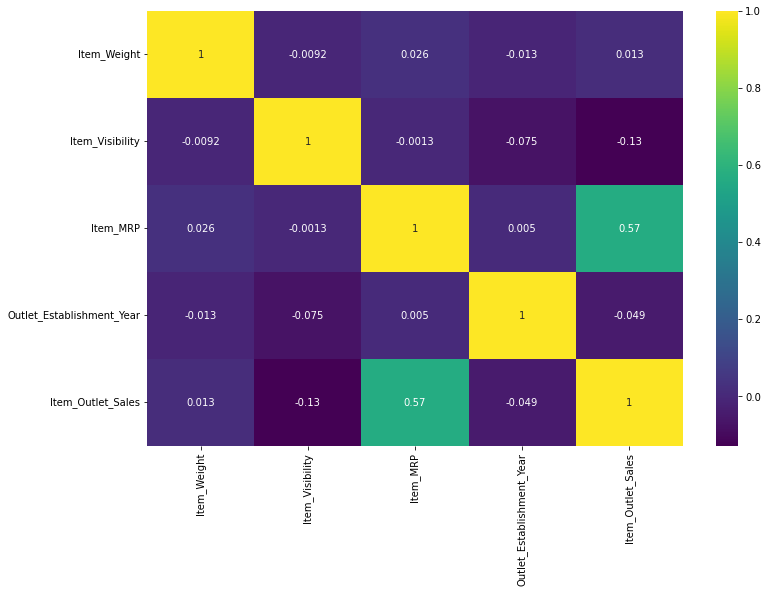

In [144]:
plt.figure(figsize=(12,8))
sns.heatmap(bg.corr(), annot=True, cmap='viridis')

<AxesSubplot:>

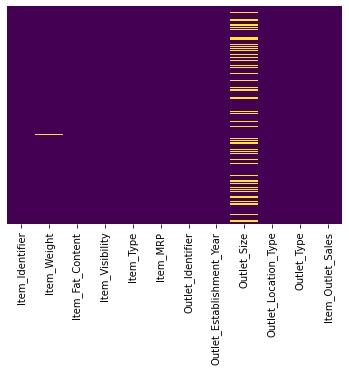

In [147]:
sns.heatmap(bg.isnull(), cmap='viridis', cbar=False, yticklabels=False)

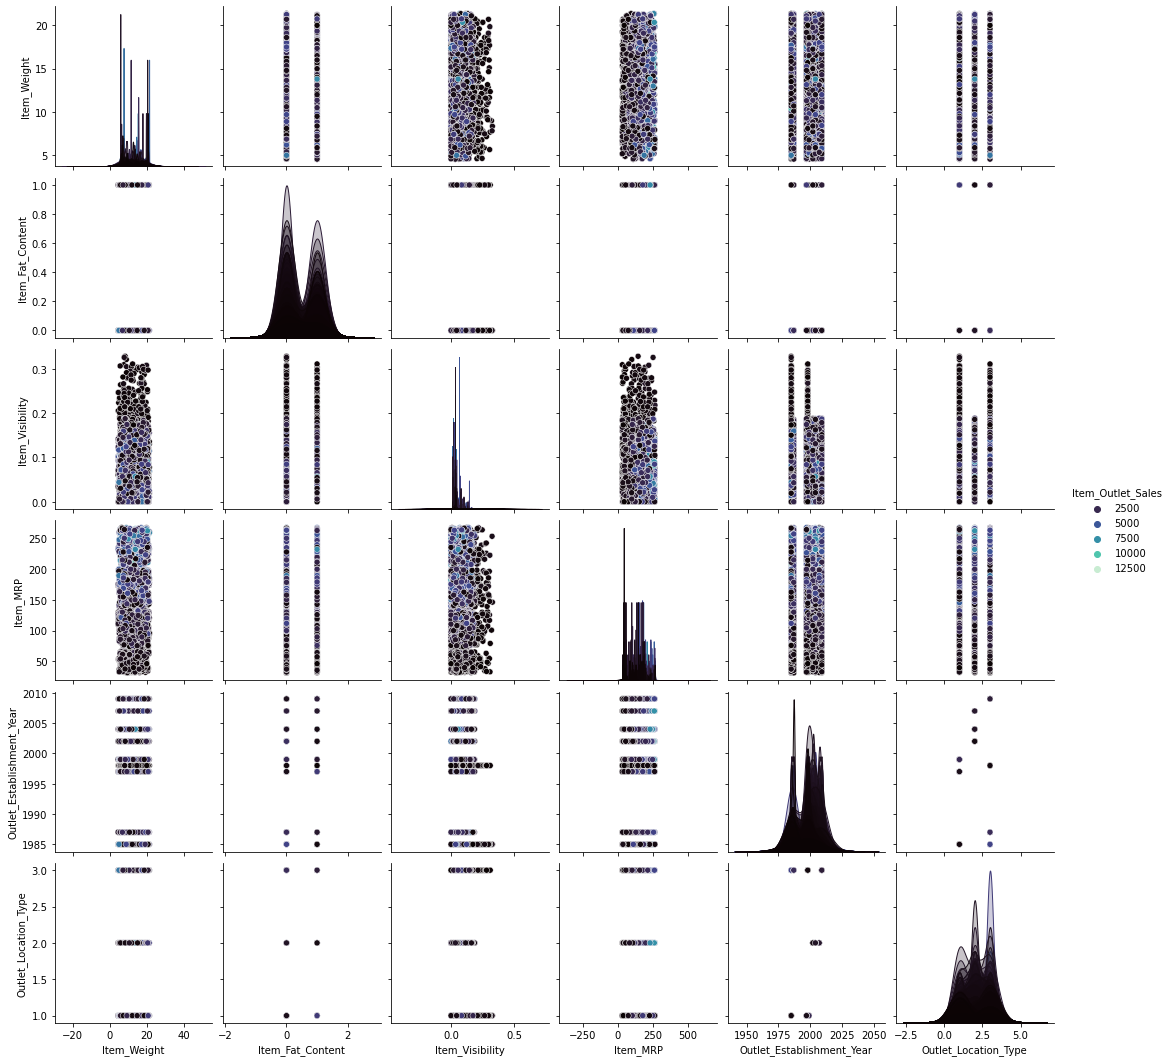

In [53]:
sns.pairplot(bg, hue='Item_Outlet_Sales', palette='mako')

In [81]:
bg = bg[bg['Item_Weight'].notna()]

In [88]:
X = bg[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Location_Type']]

In [89]:
X = pd.concat([X, itype, otype], axis=1)

In [90]:
X.isnull().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Breads                       0
Breakfast                    0
Canned                       0
Dairy                        0
Frozen Foods                 0
Fruits and Vegetables        0
Hard Drinks                  0
Health and Hygiene           0
Household                    0
Meat                         0
Others                       0
Seafood                      0
Snack Foods                  0
Soft Drinks                  0
Starchy Foods                0
Supermarket Type1            0
Supermarket Type2            0
Supermarket Type3            0
dtype: int64

In [91]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8519 non-null   float64
 1   Item_Visibility            8519 non-null   float64
 2   Item_MRP                   8519 non-null   float64
 3   Outlet_Establishment_Year  8519 non-null   int64  
 4   Outlet_Location_Type       8519 non-null   int32  
 5   Breads                     8519 non-null   uint8  
 6   Breakfast                  8519 non-null   uint8  
 7   Canned                     8519 non-null   uint8  
 8   Dairy                      8519 non-null   uint8  
 9   Frozen Foods               8519 non-null   uint8  
 10  Fruits and Vegetables      8519 non-null   uint8  
 11  Hard Drinks                8519 non-null   uint8  
 12  Health and Hygiene         8519 non-null   uint8  
 13  Household                  8519 non-null   uint8

<AxesSubplot:>

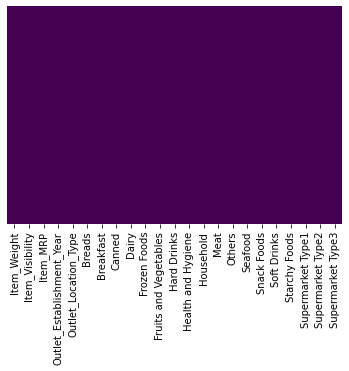

In [148]:
sns.heatmap(X.isnull(), cmap='viridis', cbar=False, yticklabels=False)

In [93]:
y = bg['Item_Outlet_Sales']

Initializing Linear Regression

In [94]:
from sklearn.linear_model import LinearRegression

In [59]:
lr = LinearRegression()

In [95]:
lr.fit(X, y)

LinearRegression()

Reading test data

In [96]:
bgr = pd.read_csv('bigmart_Test.csv')

In [98]:
bgr.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [99]:
bgr['Item_Weight'] = bgr[['Item_Identifier', 'Item_Weight']].apply(fillweight, axis=1)

In [102]:
bgr.isnull().sum()

Item_Identifier                 0
Item_Weight                     1
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [103]:
bgr['Item_Fat_Content'] = bgr['Item_Fat_Content'].apply(lambda x: 0 if (x=='lf' or x=='Low Fat' or x=='low fat') else 1)

In [104]:
bgr = bgr[bgr['Item_Weight'].notna()]

In [105]:
ityper = pd.get_dummies(bgr['Item_Type'], drop_first=True)
otyper = pd.get_dummies(bgr['Outlet_Type'], drop_first=True)

In [106]:
X_te = bgr[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Location_Type']]

In [107]:
X_te = pd.concat([X_te, ityper, otyper], axis=1)

In [114]:
X_te['Outlet_Location_Type'] = X_te['Outlet_Location_Type'].apply(lambda x: str(x).split()[1])
X_te['Outlet_Location_Type'] = X_te['Outlet_Location_Type'].astype(int)

In [116]:
pr = lr.predict(X_te)

In [131]:
bgr['Predicted Item Sales'] = pr

In [133]:
bgr.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Predicted Item Sales
0,FDW58,20.750,0,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,1,Supermarket Type1,1814.602759
1,FDW14,8.300,1,0.038428,Dairy,87.3198,OUT017,2007,NaN,2,Supermarket Type1,1469.442261
2,NCN55,14.600,0,0.099575,Others,241.7538,OUT010,1998,NaN,3,Grocery Store,1899.802484
3,FDQ58,7.315,0,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,2,Supermarket Type1,2561.079455
4,FDY38,13.600,1,0.118599,Dairy,234.2300,OUT027,1985,Medium,3,Supermarket Type3,5112.366859
